In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import pydub
import librosa

from scipy import signal

In [2]:
sample_dir = 'C:\\Users\\ghage\\Downloads\\beat_detection_samples\\'
sample_song = 'bensound-erf.mp3'
print(sample_dir+sample_song)

C:\Users\ghage\Downloads\beat_detection_samples\bensound-erf.mp3


In [5]:
song = pydub.AudioSegment.from_mp3(sample_dir + sample_song)
audio_full = np.array(song.get_array_of_samples())
fs = song.frame_rate * song.sample_width
fs

88200

In [6]:
audio = audio_full[1000000:1000000 + 2*fs]

In [8]:
hilb = signal.hilbert(audio)

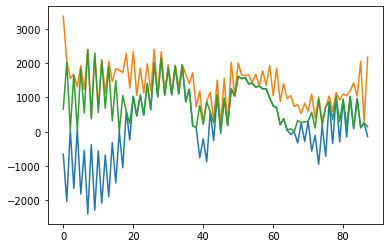

In [18]:
plt.plot(audio[:fs//1000])
plt.plot(abs(hilb)[:fs//1000])
plt.plot(abs(audio)[:fs//1000])

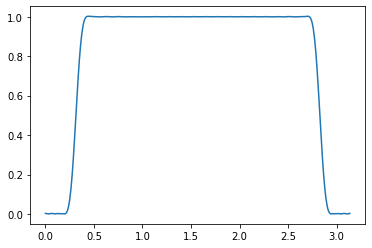

In [21]:
b = signal.firwin(101, [0.1, 0.9], pass_zero=False)
w, h = signal.freqz(b, 1)
plt.plot(w, abs(h))

In [22]:
bpf_audio = signal.lfilter(b, 1, audio)

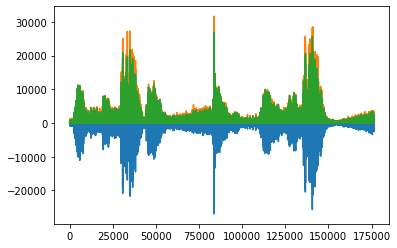

In [27]:
plt.plot(bpf_audio[:])
plt.plot(abs(signal.hilbert(bpf_audio))[:])
plt.plot(abs(bpf_audio)[:])

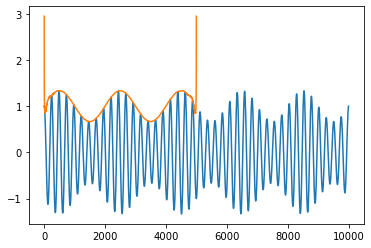

In [48]:
fs = 10e3
x = [(1 + 1/3 * np.sin(2 * np.pi / fs * i * 5))* np.cos(2 * np.pi / fs * i * 41) for i in range(10**4)]
plt.plot(x)
plt.plot(abs(signal.hilbert(x, 5000)))